In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
from shapely import Point
from statannotations.Annotator import Annotator
%matplotlib inline
plt.rcParams.update({'figure.figsize':(10,5), 'figure.dpi':200})
sns.set_palette(sns.color_palette("Set2"))

# "Training Curves" Attack

In [34]:
freemove_tfidf_refinement = pd.read_csv('results_recursive_search_freemove.csv')[['ARI', 'AMI']].rename(columns={'ARI':'ari', 'AMI':'ami'})
freemove_tfidf_refinement['data'] = 'freemove'
freemove_tfidf_refinement['step'] = 'tf_idf'

geolife_tfidf_refinement = pd.read_csv('results_recursive_search_geolife.csv')[['ARI', 'AMI']].rename(columns={'ARI':'ari', 'AMI':'ami'})
geolife_tfidf_refinement['data'] = 'geolife'
geolife_tfidf_refinement['step'] = 'tf_idf'

attack_metrics = pd.concat([pd.read_csv('attack_metrics.csv', sep=";"), freemove_tfidf_refinement.tail(1), geolife_tfidf_refinement.tail(1)])

Text(-0.3, 0.08, '0.07')

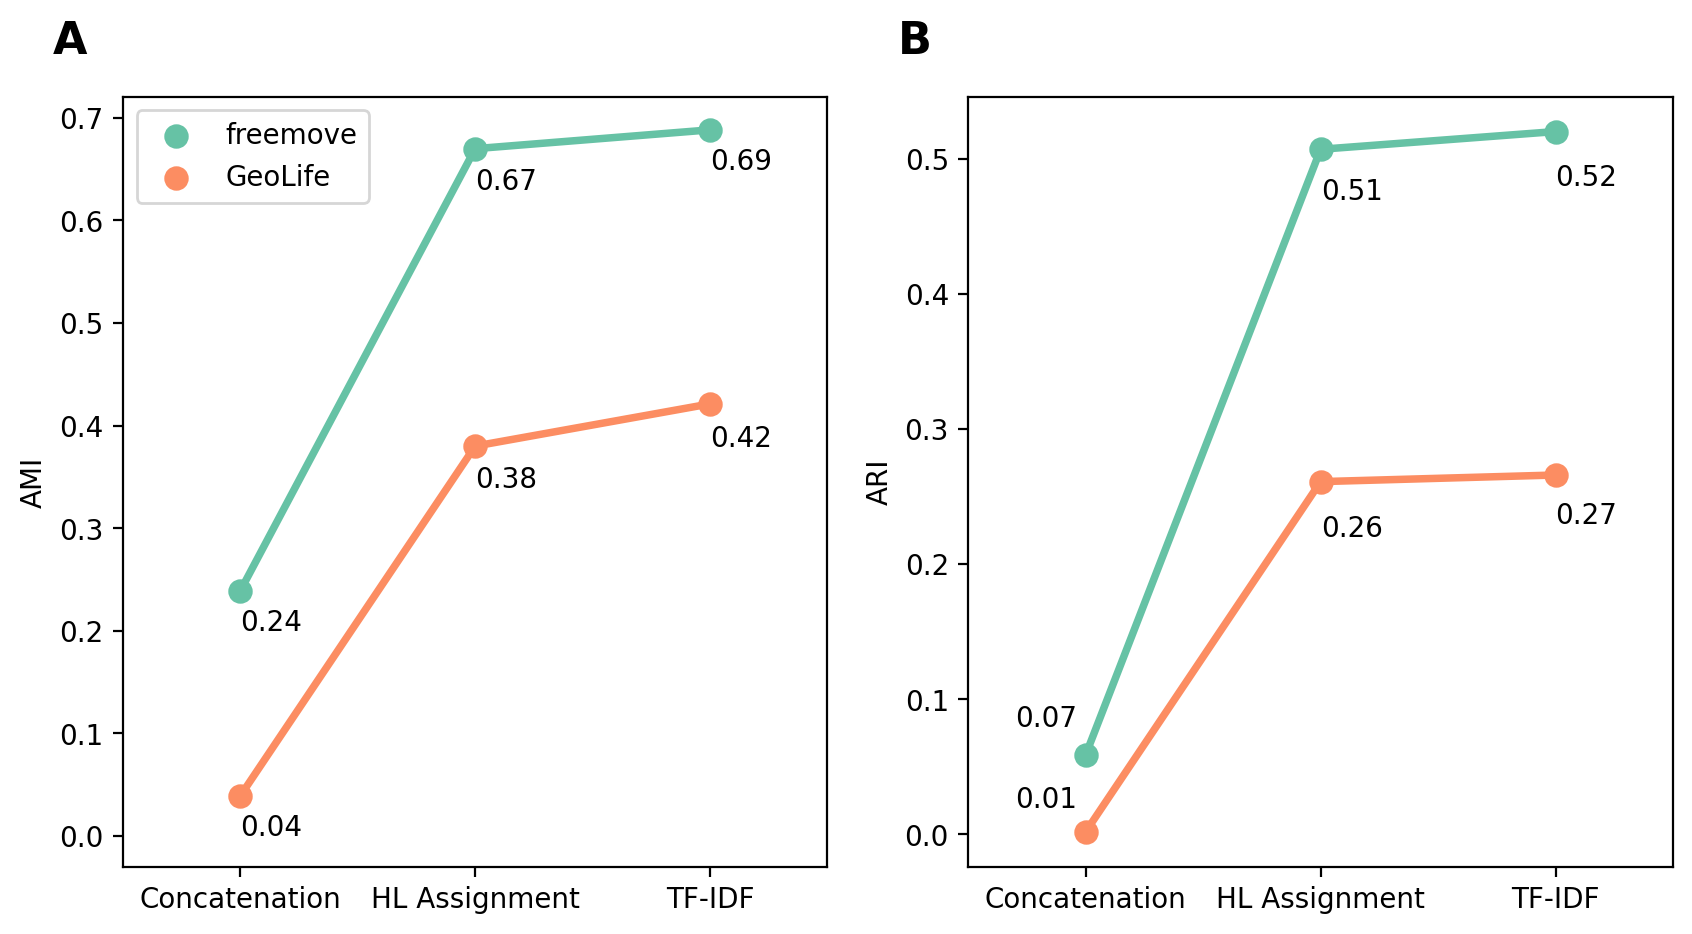

In [35]:
fig, (ax1, ax2) = plt.subplots(ncols=2)

ax1 = sns.pointplot(x="step", y="ami", data=attack_metrics, hue='data', ax=ax1)
ax2 = sns.pointplot(x="step", y="ari", data=attack_metrics, hue='data', ax=ax2)
        
ax2.legend([],[], frameon=False)
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles=handles, labels=['freemove', 'GeoLife'])


ax1.set_xlabel("")
ax2.set_xlabel("")
ax2.set_ylabel("ARI")
ax1.set_ylabel("AMI")

# Loop through each subplot and add labels
for i, ax in enumerate([ax1, ax2]):
    # Add the subplot label with bold font, aligned to the left, and only showing the letter
    ax.text(-0.1, 1.1, chr(65+i), transform=ax.transAxes, fontsize=16, fontweight='bold', ha='left', va='top')
    
ax1.set_xticklabels(['Concatenation', 'HL Assignment', 'TF-IDF'])
ax2.set_xticklabels(['Concatenation', 'HL Assignment', 'TF-IDF'])

ax1.set_ylim(-0.03)
ax2.set_xticklabels(['Concatenation', 'HL Assignment', 'TF-IDF'])

[ax1.text(p[0], p[1]-0.04, p[1], color='black') for p in zip(ax1.get_xticks(), np.round(attack_metrics.query("data=='freemove'").ami,2))]
[ax1.text(p[0], p[1]-0.04, p[1], color='black') for p in zip(ax1.get_xticks(), np.round(attack_metrics.query("data=='geolife'").ami,2))]

[ax2.text(p[0], p[1]-0.04, p[1], color='black') for p in zip(ax2.get_xticks()[1:], np.round(attack_metrics.query("data=='freemove'").ari,2)[1:])]
[ax2.text(p[0], p[1]-0.04, p[1], color='black') for p in zip(ax2.get_xticks()[1:], np.round(attack_metrics.query("data=='geolife'").ari,2)[1:])]

ax2.text(x=-0.3, y=np.round(attack_metrics.query("data=='geolife'").ari + 0.02,2).iloc[0], s=np.round(attack_metrics.query("data=='geolife'").ari + 0.01,2).iloc[0])
ax2.text(x=-0.3, y=np.round(attack_metrics.query("data=='freemove'").ari + 0.02,2).iloc[0], s=np.round(attack_metrics.query("data=='freemove'").ari + 0.01,2).iloc[0])

In [98]:
np.round(attack_metrics.query("data=='geolife'").ari,2).iloc[0]

0.0

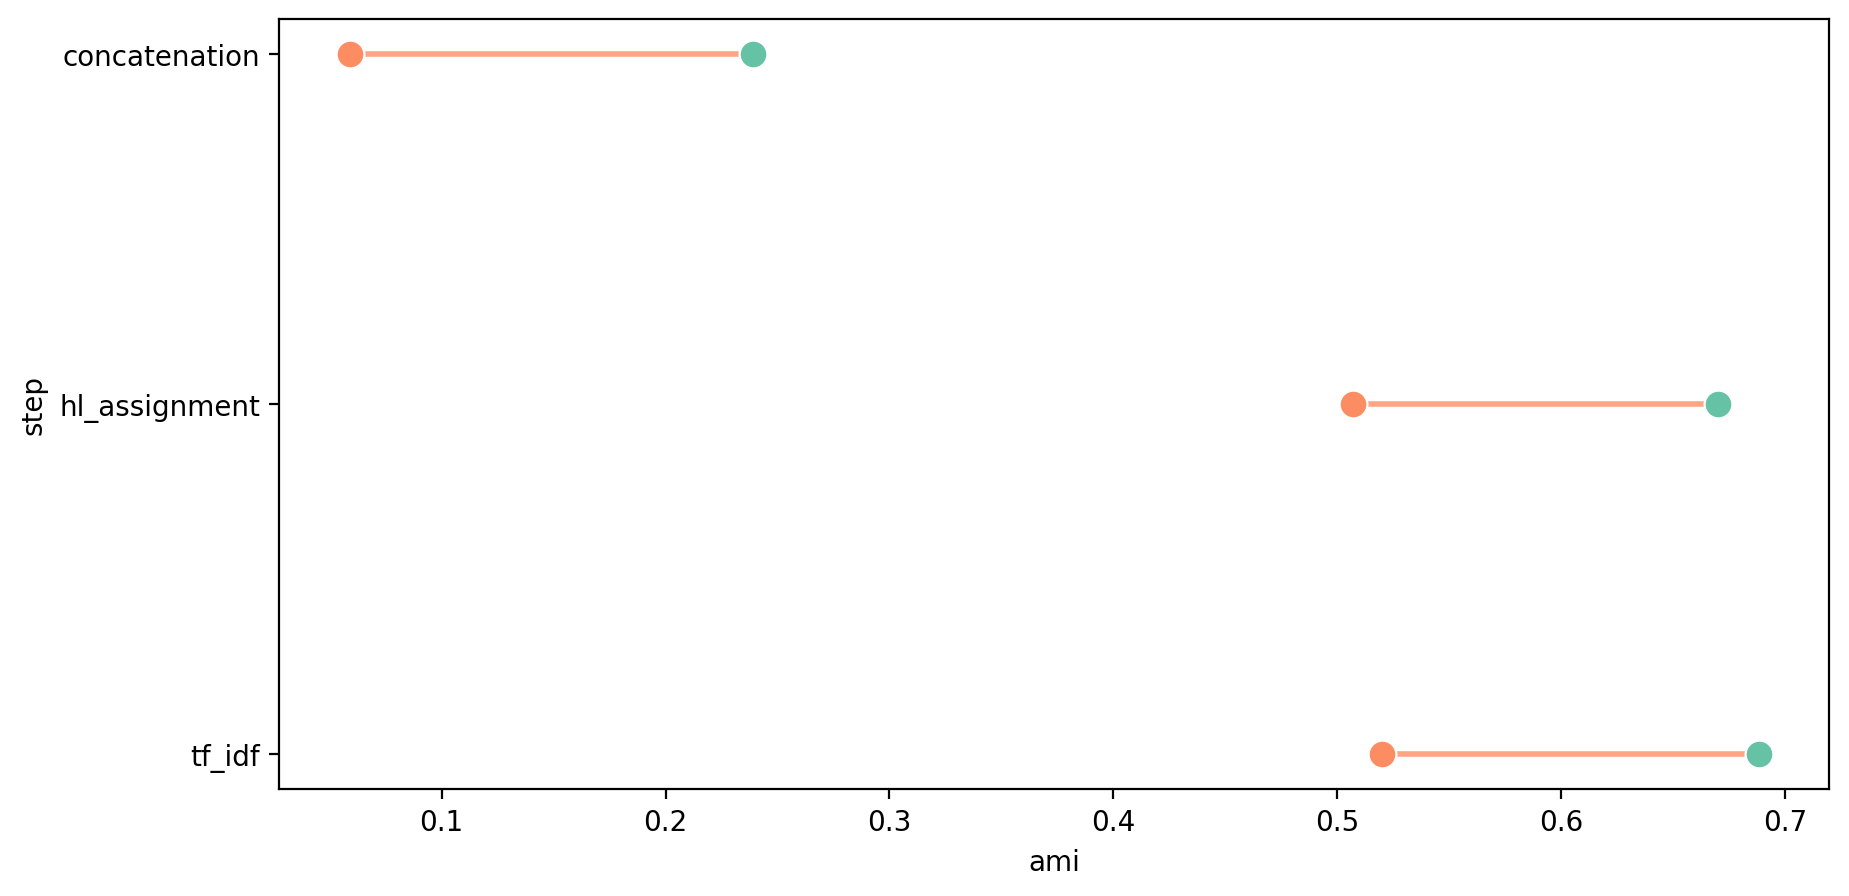

In [32]:
ax = sns.scatterplot(x="ami", y="step", data=attack_metrics.query("data=='freemove'"), s=100)
ax = sns.scatterplot(x="ari", y="step", data=attack_metrics.query("data=='freemove'"), s=100)

ax.hlines(y="step", xmin="ami", xmax="ari", color= 'coral', zorder=0, alpha=0.7, linewidth=2, data=attack_metrics.query("data=='freemove'"))




In [70]:
attack_metrics

,data,step,ari,ami
0,freemove,concatenation,0.059000,0.239000
1,freemove,hl_assignment,0.507000,0.670000
2,geolife,concatenation,0.002000,0.039000
3,geolife,hl_assignment,0.261000,0.380000
17,freemove,tf_idf,0.520113,0.688349
19,geolife,tf_idf,0.265905,0.421146
